In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath)
df.to_csv("medical_insurance_dataset_raw.csv", index=False, header=False)
df.head(1)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.77,1,0,4,1725.5523


In [5]:
df = pd.read_csv("medical_insurance_dataset_raw.csv", header=None, 
                 names=["age", "sex", "bmi", "children", "smoker", "region", "charges"])
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229
2770,54,2,31.600,0,0,3,9850.43200


In [7]:
df = df.replace('?',np.nan)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2767 non-null   object 
 1   sex       2771 non-null   int64  
 2   bmi       2771 non-null   float64
 3   children  2771 non-null   int64  
 4   smoker    2764 non-null   object 
 5   region    2771 non-null   int64  
 6   charges   2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [9]:
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2771 non-null   int64  
 1   sex       2771 non-null   int64  
 2   bmi       2771 non-null   float64
 3   children  2771 non-null   int64  
 4   smoker    2771 non-null   int64  
 5   region    2771 non-null   int64  
 6   charges   2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [81]:
df.isnull().sum()
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 0


missing_data = df.isnull()
missing_data.head(5)   

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

In [87]:
df[["charges"]] = np.round(df[["charges"]].values, 2)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


In [ ]:
#Task 3 : Exploratory Data Analysis (EDA)

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,18,2,33.77,1,0,4,1725.55


(0.0, 66902.85800000001)

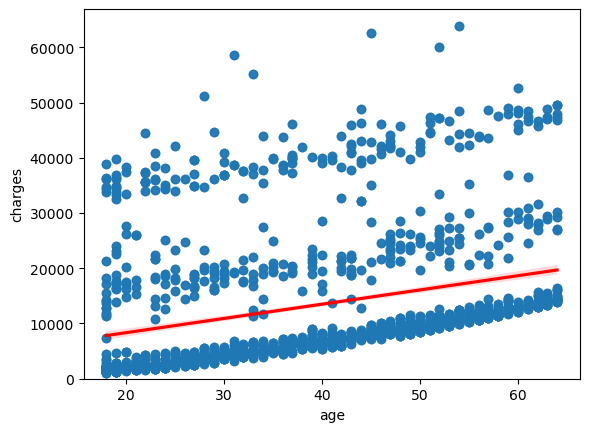

In [114]:
sns.regplot(x="age", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

In [11]:
from scipy.stats import pearsonr , spearmanr


In [112]:
corr_pearson  = df.corr(numeric_only=True)              # Pearson
corr_spearman = df.corr(numeric_only=True, method="spearman")

# Correlation of every column with charges
corr_pearson['charges'].sort_values(ascending=False)
corr_spearman['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.662104
age         0.536814
children    0.132028
bmi         0.122070
sex         0.010382
region     -0.003934
Name: charges, dtype: float64

<Axes: xlabel='age', ylabel='charges'>

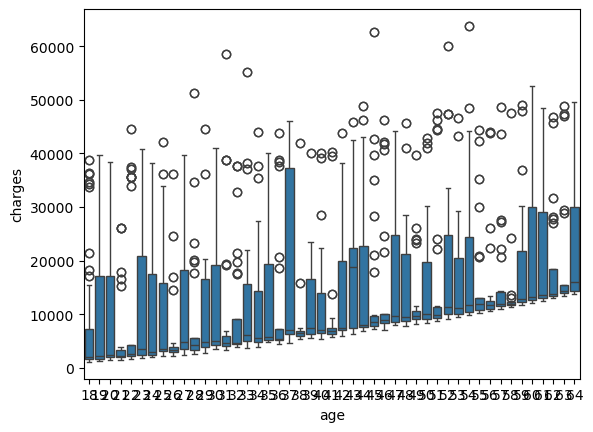

In [116]:
sns.boxplot(x="age", y="charges", data=df)

Modeling stage 🧠

In [16]:
from sklearn.linear_model import LinearRegression

In [32]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X[['smoker']], Y)     # double brackets = keeps it as DataFrame
print("R² score:", lm.score(X[['smoker']], Y))

R² score: 0.6227430384081845


💡 Build a training pipeline using ⚙️ StandardScaler(), 🔢 PolynomialFeatures(), and 📈 LinearRegression() to predict insurance charges from all other features. This step helps make the model more powerful and improves performance even more. 🚀

In [ ]:
Z = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 🎯 Split data into training and testing sets
Z_train, Z_test, Y_train, Y_test = train_test_split(Z, Y, test_size=0.2, random_state=42)

# ⚙️ Build the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Normalize features
    ('poly', PolynomialFeatures(include_bias=False)),  # Add interaction & polynomial terms
    ('model', LinearRegression())                # Fit regression model
])

# 🚀 Train the pipeline
pipeline.fit(Z_train, Y_train)

# 🔮 Predict on test data
Y_pred = pipeline.predict(Z_test)

# 📊 Evaluate performance
print("R² Score:", r2_score(Y_test, Y_pred))

R² Score: 0.8475543393169194


In [38]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

NameError: name 'x_train' is not defined

In [39]:
# 🎯 Scale features first
scaler = StandardScaler()
Z_train_scaled = scaler.fit_transform(Z_train)
Z_test_scaled = scaler.transform(Z_test)

# 🔢 Apply Polynomial Transformation (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
Z_train_poly = poly.fit_transform(Z_train_scaled)
Z_test_poly = poly.transform(Z_test_scaled)

# 📈 Fit Linear Regression on the transformed features
model = LinearRegression()
model.fit(Z_train_poly, Y_train)

# 🔮 Predict on the test set
Y_pred_poly = model.predict(Z_test_poly)

# 📊 Evaluate model performance
print("R² Score (Polynomial Regression, degree=2):", r2_score(Y_test, Y_pred_poly))

R² Score (Polynomial Regression, degree=2): 0.8475543393169194


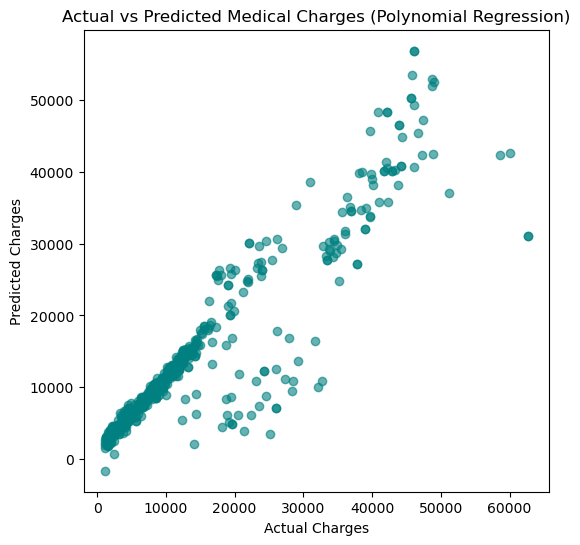

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred_poly, alpha=0.6, color='teal')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges (Polynomial Regression)")
plt.show()

The scatter plot comparing actual and predicted charges shows that most points lie close to the diagonal line, indicating strong model accuracy. The polynomial regression (degree=2) achieved an R² score of 0.85, demonstrating that the model explains 85% of the variation in insurance costs. This improvement over the basic linear model confirms the presence of non-linear relationships in the data.

In [ ]:
;/.;/.;/.;/.;/.;/.;/.;/.;/.;/.;/.